# EarthView
This notebook generates one of the figures in the paper showing the view TESS has of the Earth on each of the dates included in our regression.

In [1]:
%matplotlib inline

In [2]:
%run notebook_setup.py

In [3]:
import earthshine
import starry
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

In [4]:
# Load the Ylm expansion of the Earth
map = starry.Map(30, reflected=True, lazy=False)
map.load("earth")

Compiling `get_axis`... Done.
Compiling `align`... Done.


In [5]:
# All dates observed
t11 = np.arange(1325, 1335)
t12 = np.arange(1340, 1350)
t21 = np.arange(1363, 1367)
t22 = np.arange(1379, 1383)
t = np.concatenate((t11, t12, t21, t22))
Z = [earthshine.render(map, ti, res=150) for ti in t]

Compiling `get_inc_obl`... Done.
Compiling `rotate`... Done.
Compiling `render`... Done.


In [6]:
# Normalize
Z = np.array(Z)
Z /= np.nanmax(Z)
vmin = np.nanmin(Z)
vmax = 1

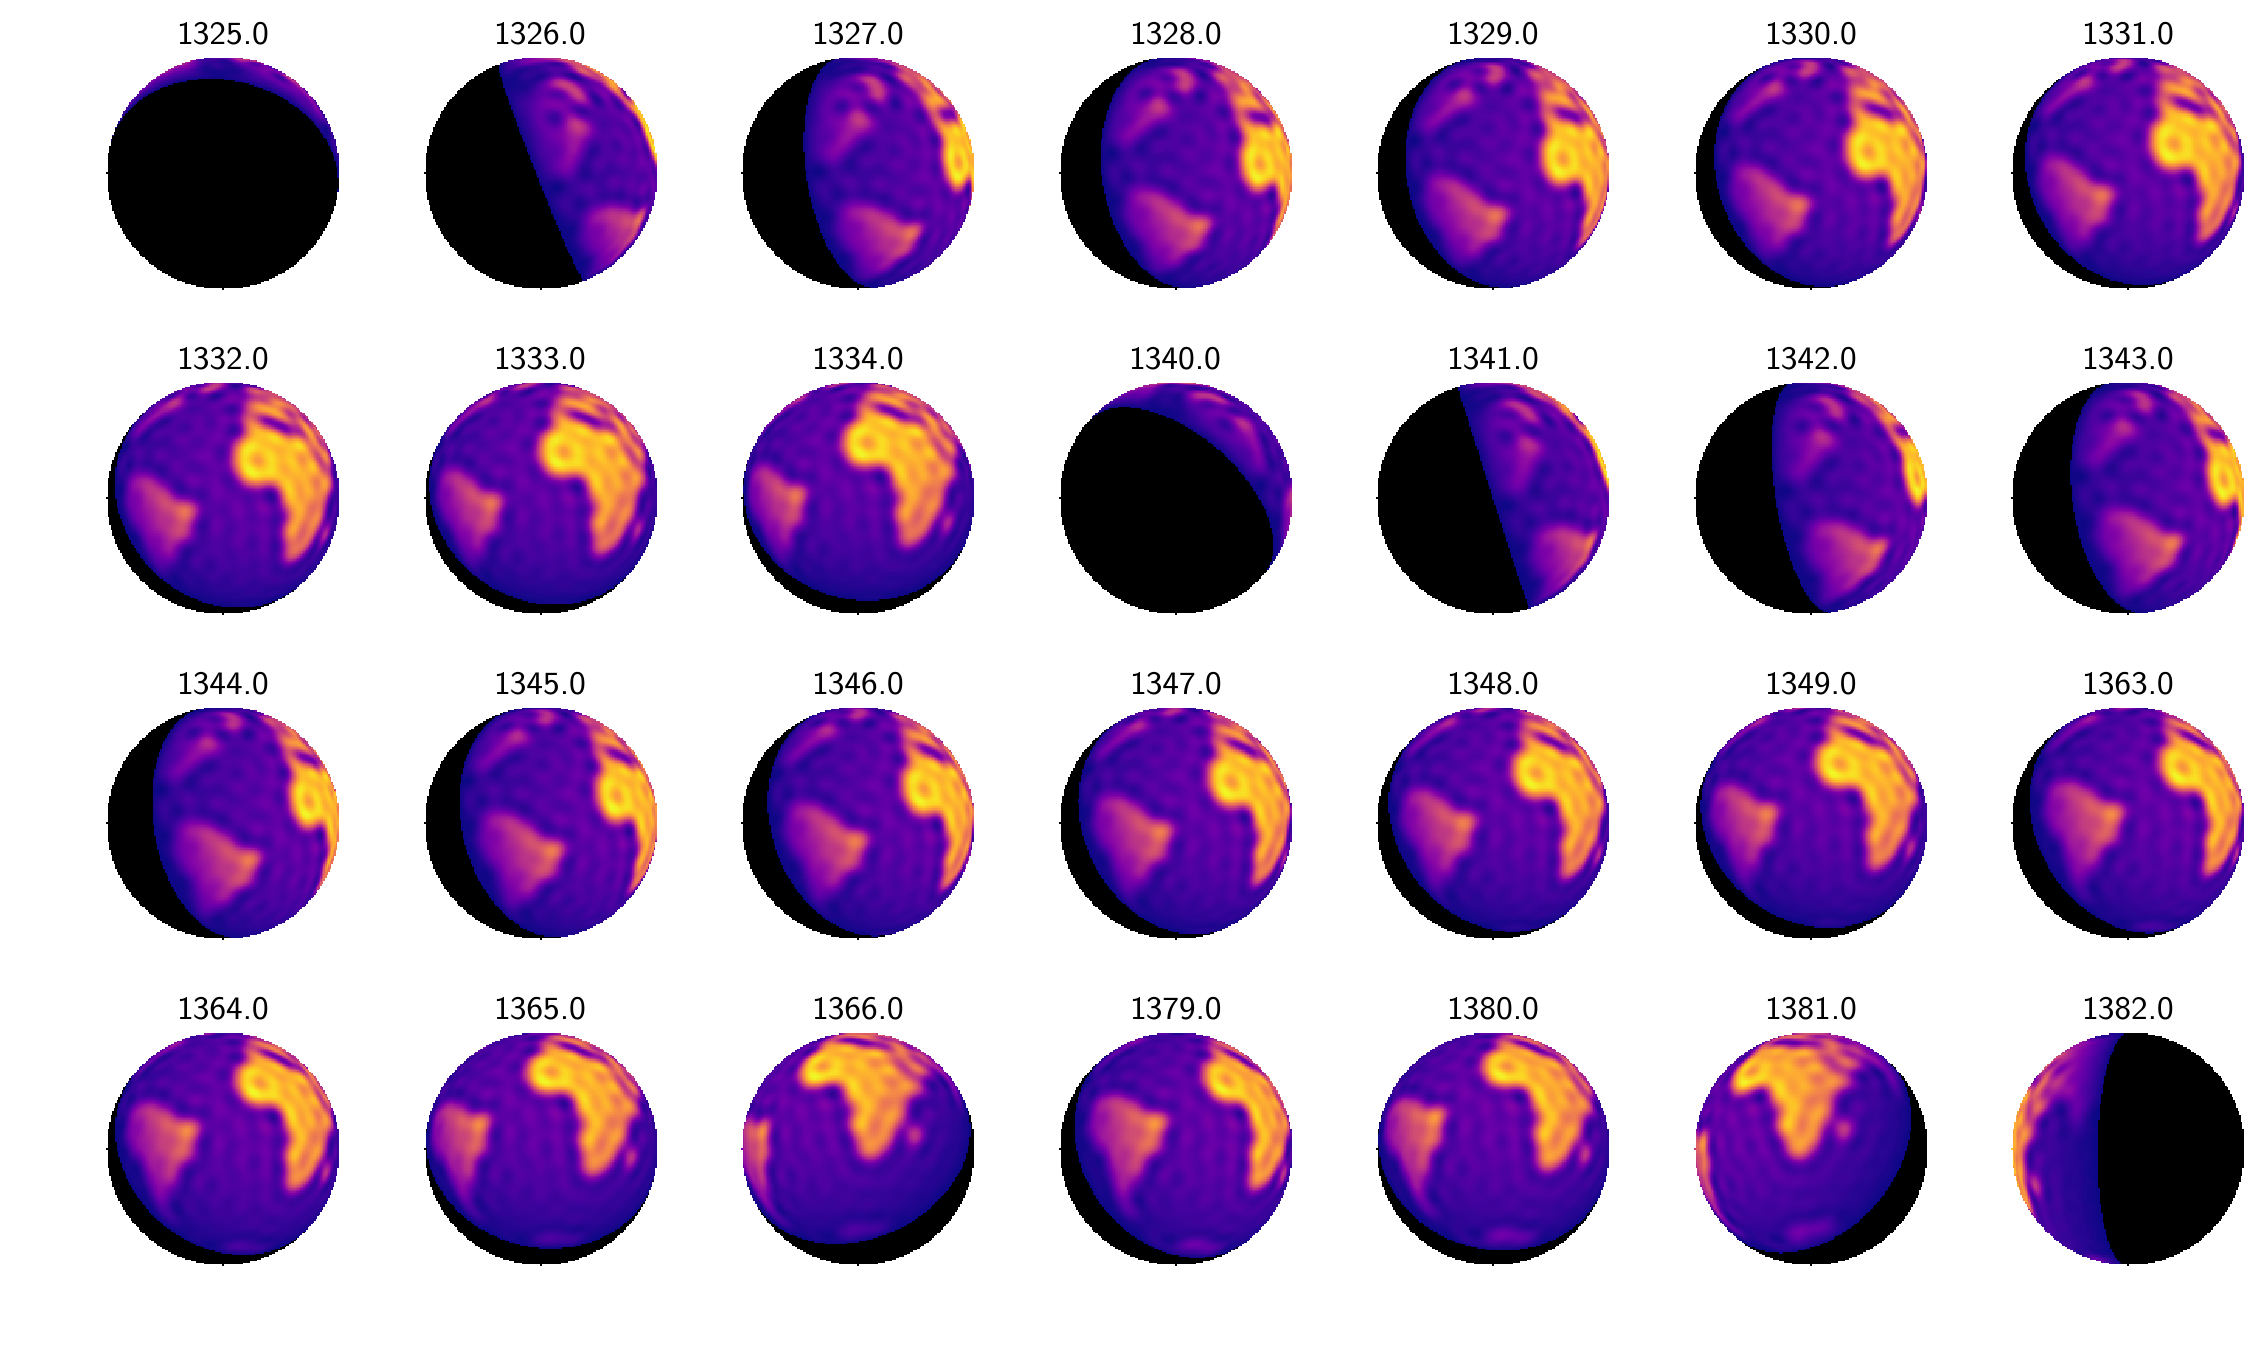

In [7]:
# Plot Earth view on every date
fig, ax = plt.subplots(4, 7, figsize=(14, 8))
fig.subplots_adjust(hspace=0.4)
ax = ax.flatten()
cmap = plt.get_cmap("plasma")
cmap.set_under((0.0, 0.0, 0.0, 1.0))
cmap.set_bad((1.0, 1.0, 1.0, 1.0))
for i, axis in enumerate(ax):
    img = np.array(Z[i])
    img[img == 0] = -1
    axis.imshow(img, origin="lower", cmap=cmap, vmin=vmin, vmax=vmax)
    axis.axis('off')
    axis.annotate("%.1f" % t[i], xy=(0.5, 1.1), xycoords="axes fraction", ha="center", va="center", fontsize=12)

# Save
fig.savefig("../tex/figures/phases.pdf", bbox_inches="tight")